# First Modeling

In [136]:
## Import all the libraries
import pandas as pd
import numpy as np

## Data Viz 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

## Transformation
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

## for statistical tests
from math import sqrt
import scipy
from scipy.fft import fft, fftfreq
import statistics
from statistics import mean
import statsmodels.api as sm
import statsmodels.formula.api as smf

## SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.svm import SVC

## Cluster Centroids
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import KMeans

## Modelling 
from sklearn import datasets, decomposition, ensemble, feature_selection, linear_model, metrics, model_selection, preprocessing, svm, tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, explained_variance_score, f1_score, mean_absolute_error, mean_squared_error, precision_score, r2_score, recall_score
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score, GridSearchCV, ShuffleSplit, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

import time

print('Libraries imported successfully')

Libraries imported successfully


In [98]:
# Load Code for GitHub
df = pd.read_csv('arrhythmia_preprocessed_cleaned_classes_label.csv')

# Seperate Features, Standardize and Split

In [99]:
# Separate features and target variable
X = df.drop(['class','label'], axis=1)  # Features
y = df['label']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Save X train and X_test without PCA 
X_train_saved = X_train
X_test_saved = X_test
y_train_saved = y_train
y_test_saved = y_test

## PCA - Principal Component Analysis

Cumulative variance ratio with 10 components: 0.42
Cumulative variance ratio with 20 components: 0.568
Cumulative variance ratio with 30 components: 0.664
Cumulative variance ratio with 40 components: 0.736
Cumulative variance ratio with 50 components: 0.793
Cumulative variance ratio with 75 components: 0.891
Cumulative variance ratio with 100 components: 0.946


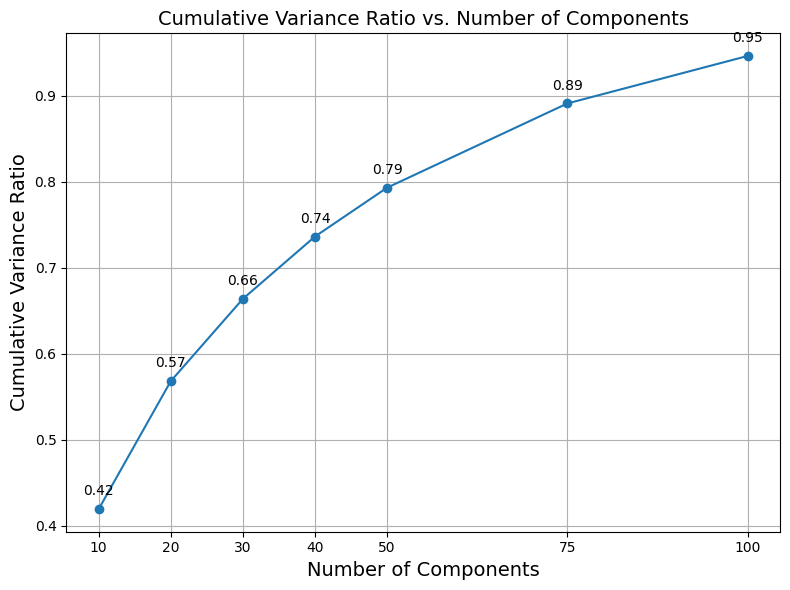

Selected number of components: 79


In [100]:
####  Principal Component Analysis

# Separate features and target variable
X = df.drop('label', axis=1)  # Features
y = df['label']  # Target variable
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define different numbers of components to try
n_components_list = [10,20,30,40,50,75,100]
cumulative_variance_ratios = []

for n_components in n_components_list:
    # Instantiate PCA with desired number of components
    pca = PCA(n_components=n_components)

    # Fit PCA to the standardized data
    pca.fit(X_scaled)
    
    # Transform the data into the new feature space
    X_pca = pca.transform(X_scaled)

    # Save the results in individual dataframes
    globals()[f'X_pca_{n_components}'] = pd.DataFrame(X_pca)

    # Get the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = sum(explained_variance_ratio)
    cumulative_variance_ratios.append(cumulative_variance_ratio)

    # Print cumulative variance ratio
    print(f'Cumulative variance ratio with {n_components} components:', cumulative_variance_ratio.round(3))
    
# Plot cumulative variance ratio
plt.figure(figsize=(8, 6))
plt.plot(n_components_list, cumulative_variance_ratios, marker='o', linestyle='-')
plt.title('Cumulative Variance Ratio vs. Number of Components', fontsize=14)
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Variance Ratio', fontsize=14)
plt.xticks(n_components_list)
plt.grid(True)

# Add annotations
for i, txt in enumerate(cumulative_variance_ratios):
    plt.annotate(f'{txt:.2f}', (n_components_list[i], cumulative_variance_ratios[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.tight_layout()
plt.savefig('PCA_cumulative_variance_ratio_vs_nr_components.png') 
plt.show()

# Initialize PCA with 'mle' to automatically determine the number of components
pca = PCA(n_components='mle')

# Fit PCA to the standardized data
pca.fit(X_scaled)

# Get the number of components that explain at least 90% of the variance
n_components = pca.explained_variance_ratio_.cumsum().searchsorted(0.90) + 1

# Print the selected number of components
print(f'Selected number of components: {n_components}')

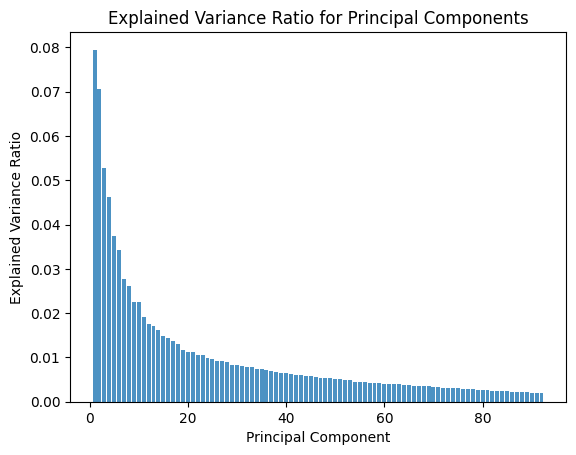

In [101]:
# Re-run PCA with the selected number of components 
pca = PCA(n_components=92)
X_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Visualize the explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.show()

In [102]:
# PCA on training data set 
pca = PCA(n_components = .8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(pca.n_components_)

47


# Smote

In [103]:
#SMOTE
smo = SMOTE()
X_train_sm, y_train_sm = smo.fit_resample(X_train, y_train)

print("Shape of X_train resampled with smote:", X_train_sm.shape)
print("Shape of y_train resampled with smote:", y_train_sm.shape)
print('SMOTE :', dict(pd.Series(y_train_sm).value_counts()))

Shape of X_train resampled with smote: (402, 278)
Shape of y_train resampled with smote: (402,)
SMOTE : {0: 201, 1: 201}


# Set X_train and X_test 

In [104]:
X_train = X_train_pca
X_test = X_test_pca

# Model Testing

## Define Classifiers and parameters

In [142]:
# Define classifiers with specified parameters
clf_lr = LogisticRegression(random_state=22, max_iter=2000)
clf_rf = RandomForestClassifier(random_state=22)
clf_svc = SVC(random_state=22)
clf_lr_reg = LogisticRegression(random_state=42)
clf_gb = GradientBoostingClassifier(random_state=42)
clf_adabase = DecisionTreeClassifier()
clf_ada = AdaBoostClassifier(base_estimator=clf_adabase, random_state=42)
clf_xgb = xgb.XGBClassifier()

# Define parameter grids for each classifier
param_grid_lr = {'solver': ['liblinear', 'lbfgs'], 'C': np.logspace(-4, 2, 9)}
param_grid_rf = [{'n_estimators': [10, 50, 100, 250, 500, 1000], 
                  'min_samples_leaf': [1, 3, 5], 
                  'max_features': ['sqrt', 'log2']}]
param_grid_svc = [
    {'kernel': ['linear'], 'C': np.logspace(-4, 4, 5)}
]

param_grid_lr_reg = {
    'penalty': ['elasticnet'],
    'solver': ['saga'],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9], 
    'C': np.logspace(-4, 2, 9), 
    'max_iter': [100, 200, 300],
    'fit_intercept': [True, False],
    'tol': [0.0001, 0.001, 0.01],
    'class_weight': [None, 'balanced']
}

param_grid_gb = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5]
}

param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'base_estimator__max_depth': [1, 2, 3],
    'base_estimator__min_samples_split': [2, 3, 4]
}

param_grid_xgb = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

print('parameters set')
# Initialize dictionaries to store results
#gridcvs = {}
#outer_scores = {}
#accuracies = {}

parameters set


# Logistic Regression

In [157]:
# Logistic Regression
print("\n--- Logistic Regression ---")
gcv_lr = GridSearchCV(clf_lr, param_grid_lr, cv=3, refit=True)
gcv_lr.fit(X_train, y_train)
print(f'Best parameters: {gcv_lr.best_params_}')
train_predictions_lr = gcv_lr.predict(X_train)
test_predictions_lr = gcv_lr.predict(X_test)
train_acc_lr = accuracy_score(y_train, train_predictions_lr)
test_acc_lr = accuracy_score(y_test, test_predictions_lr)
print(f'Training Accuracy: {train_acc_lr:.2f}')
print(f'Test Accuracy: {test_acc_lr:.2f}')


--- Logistic Regression ---
Best parameters: {'C': 0.5623413251903491, 'solver': 'lbfgs'}
Training Accuracy: 0.97
Test Accuracy: 1.00


# LogisticRegressionCV / Elasticnet

In [119]:
# Logistic Regression Reg - Elasticnet
print("\n--- Logistic Regression Reg - Elasticnet ---")
gcv_lr_reg = GridSearchCV(clf_lr_reg, param_grid_lr_reg, cv=3, refit=True)
gcv_lr_reg.fit(X_train, y_train)
print(f'Best parameters: {gcv_lr_reg.best_params_}')
train_predictions_lr_reg = gcv_lr_reg.predict(X_train)
test_predictions_lr_reg = gcv_lr_reg.predict(X_test)
train_acc_lr_reg = accuracy_score(y_train, train_predictions_lr_reg)
test_acc_lr_reg = accuracy_score(y_test, test_predictions_lr_reg)
print(f'Training Accuracy: {train_acc_lr:.2f}')
print(f'Test Accuracy: {test_acc_lr:.2f}')


--- Logistic Regression Reg - Elasticnet ---
Best parameters: {'C': 0.01, 'class_weight': None, 'fit_intercept': True, 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga', 'tol': 0.0001}
Training Accuracy: 0.81
Test Accuracy: 0.76


# Random Forest

In [108]:
print("\n--- Random Forest ---")
gcv_rf = GridSearchCV(clf_rf, param_grid_rf, cv=3, refit=True)
gcv_rf.fit(X_train, y_train)
print(f'Best parameters: {gcv_rf.best_params_}')
train_predictions_rf = gcv_rf.predict(X_train)
test_predictions_rf = gcv_rf.predict(X_test)
train_acc_rf = accuracy_score(y_train, train_predictions_rf)
test_acc_rf = accuracy_score(y_test, test_predictions_rf)
print(f'Training Accuracy: {train_acc_rf:.2f}')
print(f'Test Accuracy: {test_acc_rf:.2f}')


--- Random Forest ---
Best parameters: {'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 1000}
Training Accuracy: 0.96
Test Accuracy: 0.69


# SVM

In [118]:
print("\n--- SVM ---")
gcv_svc = GridSearchCV(clf_svc, param_grid_svc, cv=3, refit=True)
gcv_svc.fit(X_train, y_train)
print(f'Best parameters: {gcv_svc.best_params_}')
train_predictions_svc = gcv_svc.predict(X_train)
test_predictions_svc = gcv_svc.predict(X_test)
train_acc_svc = accuracy_score(y_train, train_predictions_svc)
test_acc_svc = accuracy_score(y_test, test_predictions_svc)
print(f'Training Accuracy: {train_acc_svc:.2f}')
print(f'Test Accuracy: {test_acc_svc:.2f}')


--- SVM ---
Best parameters: {'C': 0.01, 'kernel': 'linear'}
Training Accuracy: 0.82
Test Accuracy: 0.73


# Gradientboost

In [117]:
print("\n--- Gradientboost ---")
gcv_gb = GridSearchCV(clf_gb, param_grid_gb, cv=3, refit=True)
gcv_gb.fit(X_train, y_train)
print(f'Best parameters: {gcv_gb.best_params_}')
train_predictions_gb = gcv_gb.predict(X_train)
test_predictions_gb = gcv_gb.predict(X_test)
train_acc_gb = accuracy_score(y_train, train_predictions_gb)
test_acc_gb = accuracy_score(y_test, test_predictions_gb)
print(f'Training Accuracy: {train_acc_svc:.2f}')
print(f'Test Accuracy: {test_acc_svc:.2f}')


--- Gradientboost ---
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Training Accuracy: 0.91
Test Accuracy: 0.66


# Adaboost

In [123]:
print("\n--- Gradientboost ---")
gcv_ada = GridSearchCV(clf_ada, param_grid_ada, cv=3, refit=True)
gcv_ada.fit(X_train, y_train)
print(f'Best parameters: {gcv_ada.best_params_}')
train_predictions_ada = gcv_ada.predict(X_train)
test_predictions_ada = gcv_ada.predict(X_test)
train_acc_ada = accuracy_score(y_train, train_predictions_ada)
test_acc_ada = accuracy_score(y_test, test_predictions_ada)
print(f'Training Accuracy: {train_acc_svc:.2f}')
print(f'Test Accuracy: {test_acc_svc:.2f}')


--- Gradientboost ---
Best parameters: {'base_estimator__max_depth': 2, 'base_estimator__min_samples_split': 2, 'learning_rate': 0.05, 'n_estimators': 150}
Training Accuracy: 0.82
Test Accuracy: 0.73


# XGBoost

In [124]:
# Define parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': 3,  # Number of classes
}

print("\n--- Gradientboost ---")
gcv_xgb = GridSearchCV(clf_xgb, param_grid_xgb, cv=3, scoring='accuracy')
gcv_xgb.fit(X_train, y_train)
print(f'Best parameters: {gcv_xgb.best_params_}')
train_predictions_xgb = gcv_xgb.predict(X_train)
test_predictions_xgb = gcv_xgb.predict(X_test)
train_acc_xgb = accuracy_score(y_train, train_predictions_xgb)
test_acc_xgb = accuracy_score(y_test, test_predictions_xgb)
print(f'Training Accuracy: {train_acc_svc:.2f}')
print(f'Test Accuracy: {test_acc_svc:.2f}')


--- Gradientboost ---
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Training Accuracy: 0.82
Test Accuracy: 0.73


# Model Comparison

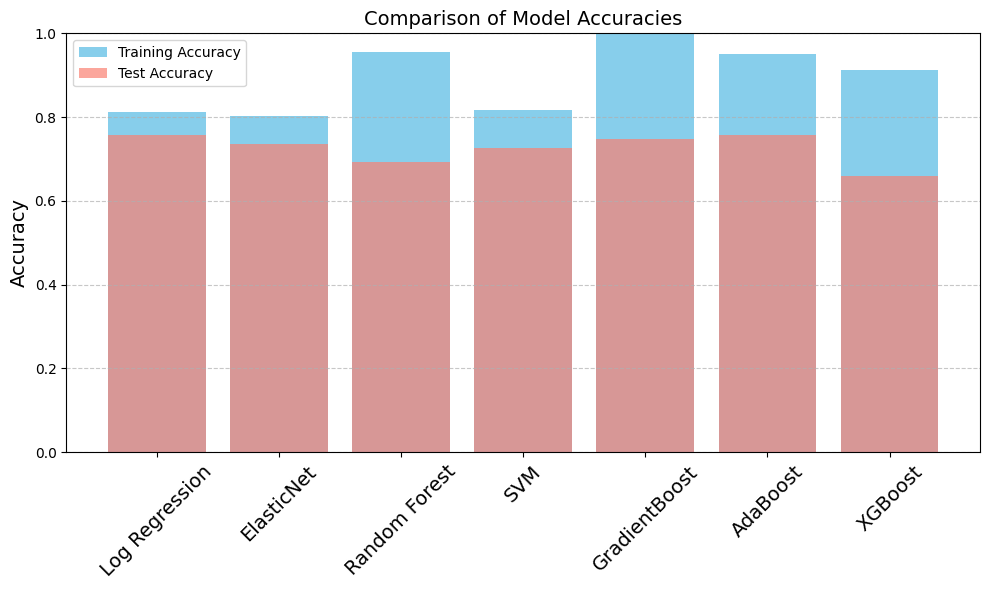

In [128]:
models = ['Log Regression', 'ElasticNet', 'Random Forest', 'SVM', 'GradientBoost', 'AdaBoost', 'XGBoost']
train_accuracies = [train_acc_lr, train_acc_lr_reg, train_acc_rf, train_acc_svc, train_acc_gb, train_acc_ada, train_acc_xgb]
test_accuracies = [test_acc_lr, test_acc_lr_reg, test_acc_rf, test_acc_svc, test_acc_gb, test_acc_ada, test_acc_xgb]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, train_accuracies, color='skyblue', label='Training Accuracy')
plt.bar(models, test_accuracies, color='salmon', alpha=0.7, label='Test Accuracy')
plt.title('Comparison of Model Accuracies', fontsize=14)
#plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(models, fontsize=14, rotation=45)  # Set font size for model labels and rotate them
plt.tight_layout()
plt.savefig('LR_RF_SVM_comparison_1.png')
plt.show()

In [129]:
# Define the best-performing model with its best parameters
best_model = LogisticRegression(C=0.0031622776601683794, solver='liblinear')  # Example for logistic regression

# Fit the model
best_model.fit(X_train, y_train)

# Make predictions
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

# Evaluate performance metrics
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Evaluation Metrics:
Training Accuracy: 0.81
Test Accuracy: 0.76
Precision: 0.86
Recall: 0.64
F1 Score: 0.73
ROC AUC Score: 0.76


In [130]:
# Define the best-performing model with its best parameters
best_model = LogisticRegression(C=0.0031622776601683794, solver='liblinear')  # Example for logistic regression

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Results:")
print("Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean().round(3))
print("Standard Deviation:", cv_scores.std().round(3))

Cross-Validation Results:
Accuracy Scores: [0.76712329 0.80555556 0.73611111 0.76388889 0.75      ]
Mean Accuracy: 0.765
Standard Deviation: 0.023
